In [22]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с): 121.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '34': 0, '35': 0, '36': 0, '37': 0, '45': 0, '46': 0, '47': 0, '56': 0, '57': 0, '67': 0}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0

<ipython-input-23-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


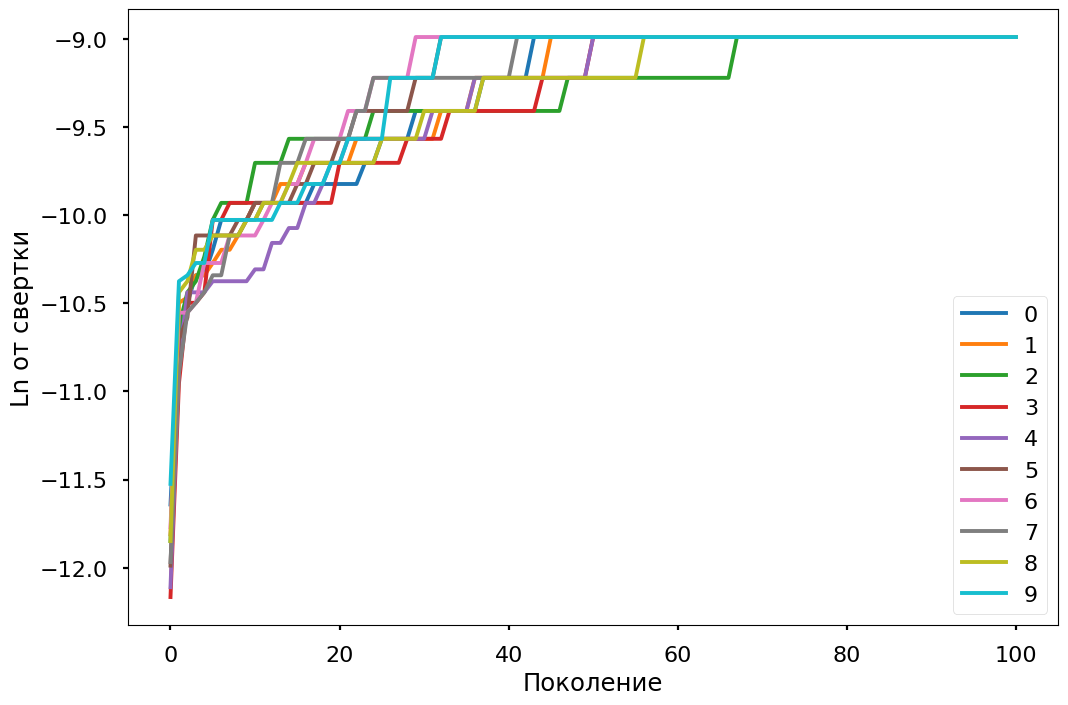

In [23]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

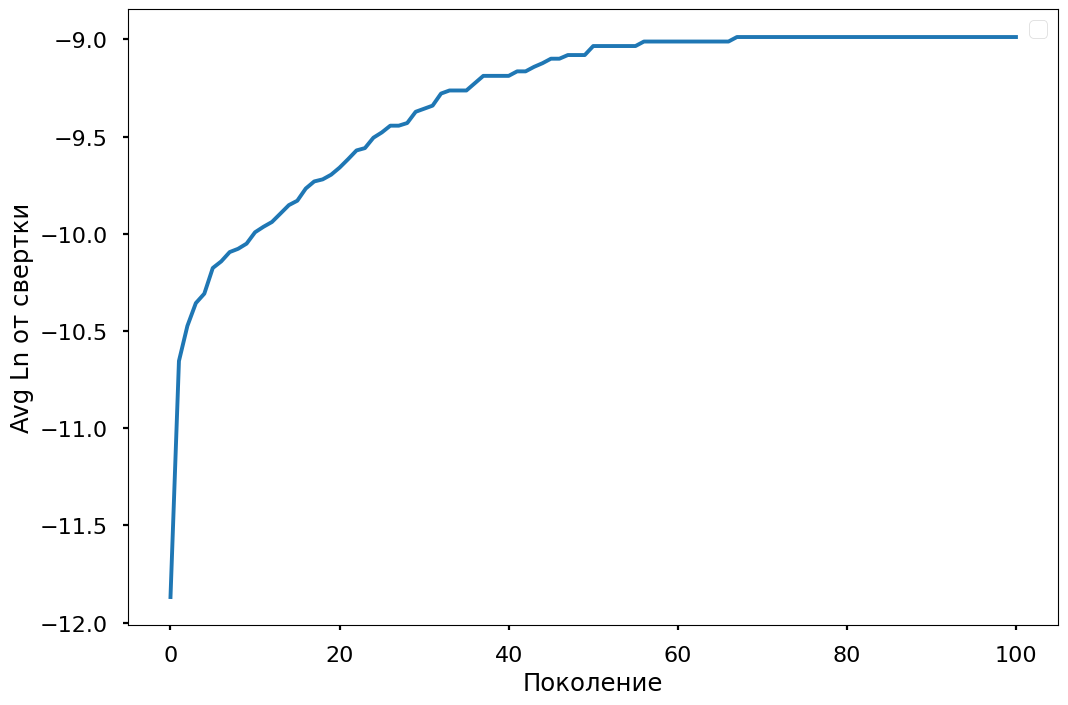

In [24]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

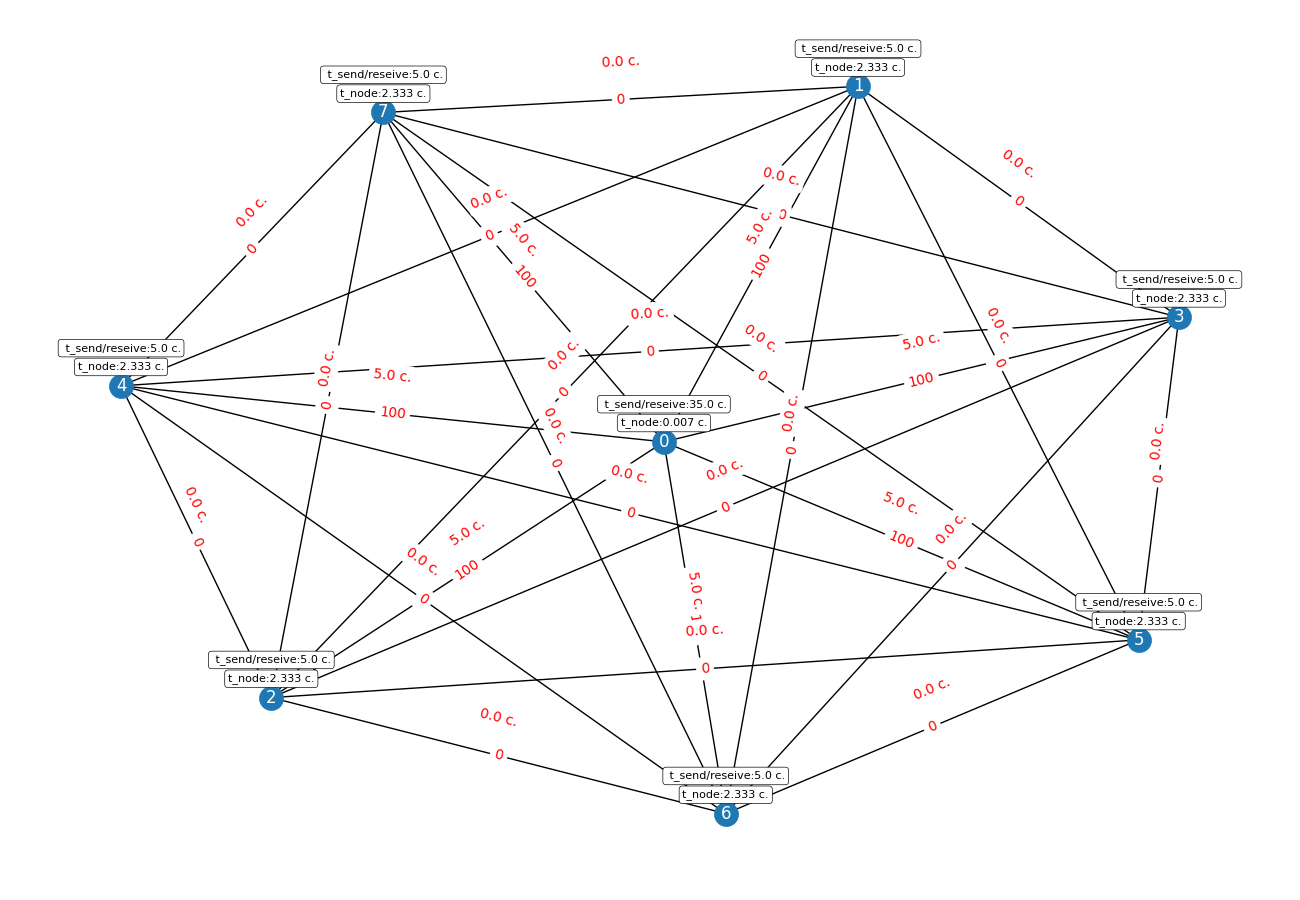

In [25]:
experements[0][-1][-1].draw_result()

In [26]:
print(experements[0][-1][-1])

Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с): 121.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '34': 0, '35': 0, '36': 0, '37': 0, '45': 0, '46': 0, '47': 0, '56': 0, '57': 0, '67': 0}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0

In [27]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        # 'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [28]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

In [29]:
res = Solution([1,6,6,6,6,6,6,6])
print(res)

Cвертка: 0.0014285714285714286,
Временя выполнение задачи (с): 121.34,
Хромосома: [1 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '34': 0, '35': 0, '36': 0, '37': 0, '45': 0, '46': 0, '47': 0, '56': 0, '57': 0, '67': 0}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0

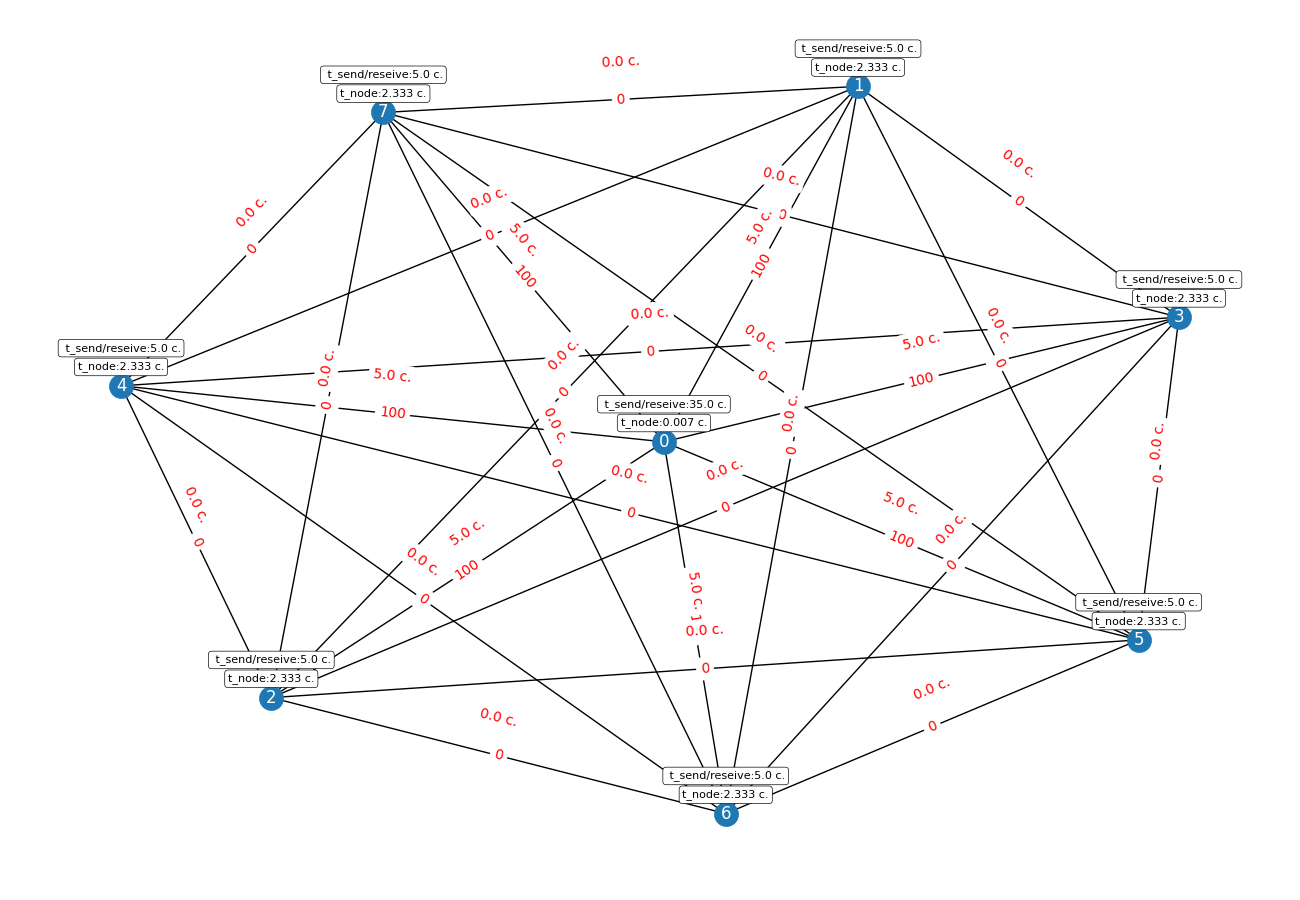

In [30]:
res.draw_result()

In [31]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 0.0014285714285714286,
Временя выполнение задачи (с): 121.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '34': 0, '35': 0, '36': 0, '37': 0, '45': 0, '46': 0, '47': 0, '56': 0, '57': 0, '67': 0}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0

<ipython-input-32-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


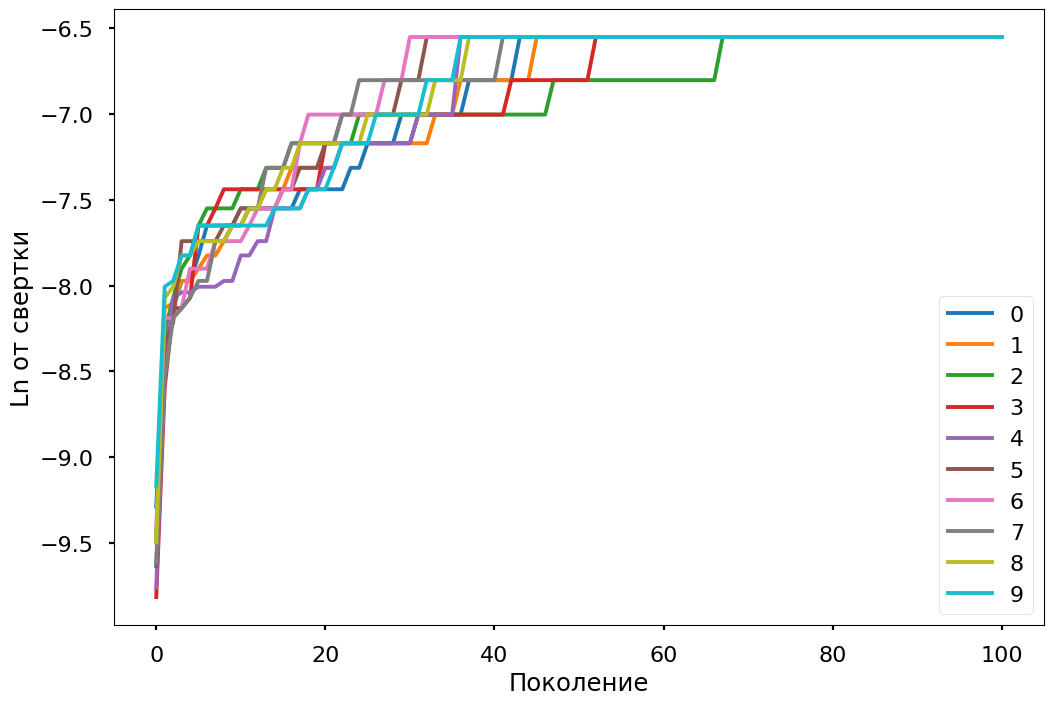

In [32]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

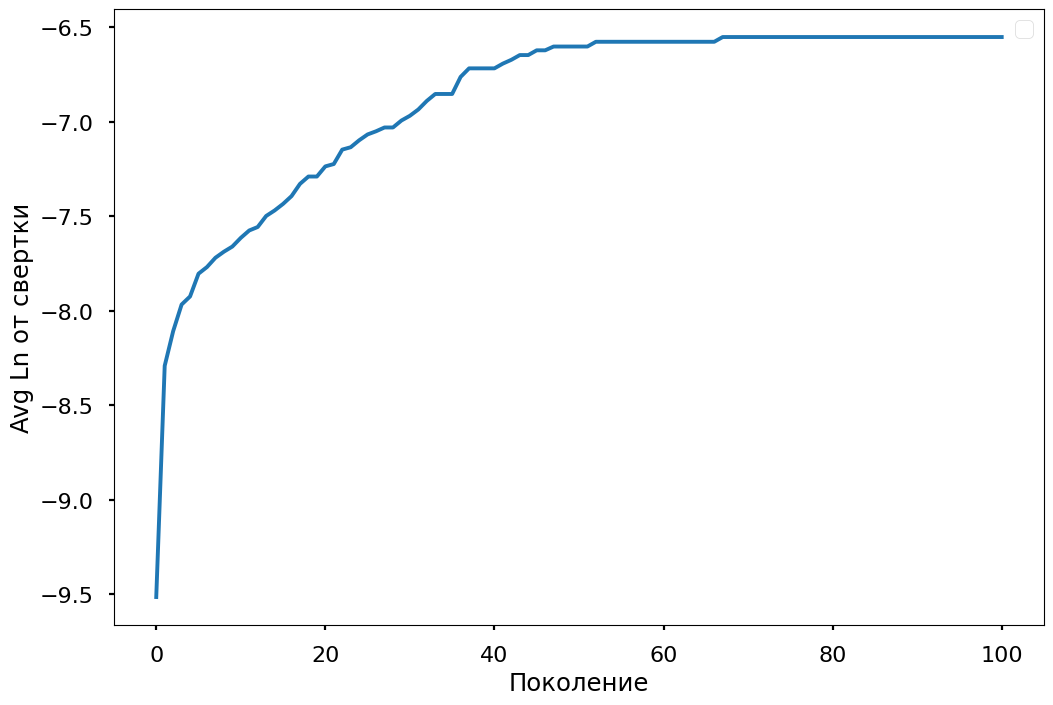

In [33]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

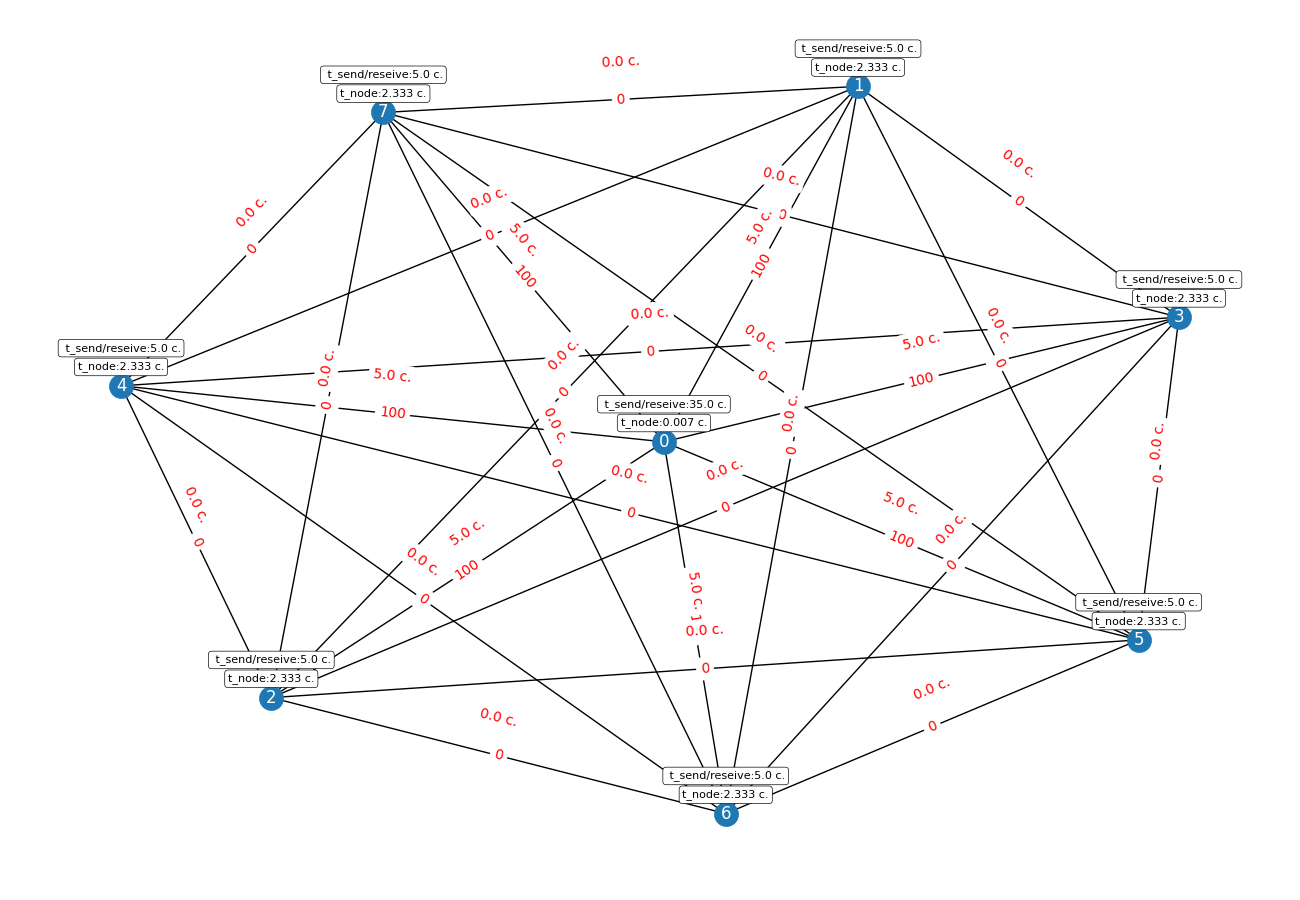

In [34]:
experements[0][-1][-1].draw_result()

In [35]:
print(experements[0][-1][-1])

Cвертка: 0.0014285714285714286,
Временя выполнение задачи (с): 121.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '34': 0, '35': 0, '36': 0, '37': 0, '45': 0, '46': 0, '47': 0, '56': 0, '57': 0, '67': 0}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0

In [36]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [37]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

In [38]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 1.7849104189912902e-07,
Временя выполнение задачи (с): 121.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '34': 0, '35': 0, '36': 0, '37': 0, '45': 0, '46': 0, '47': 0, '56': 0, '57': 0, '67': 0}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.

<ipython-input-39-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


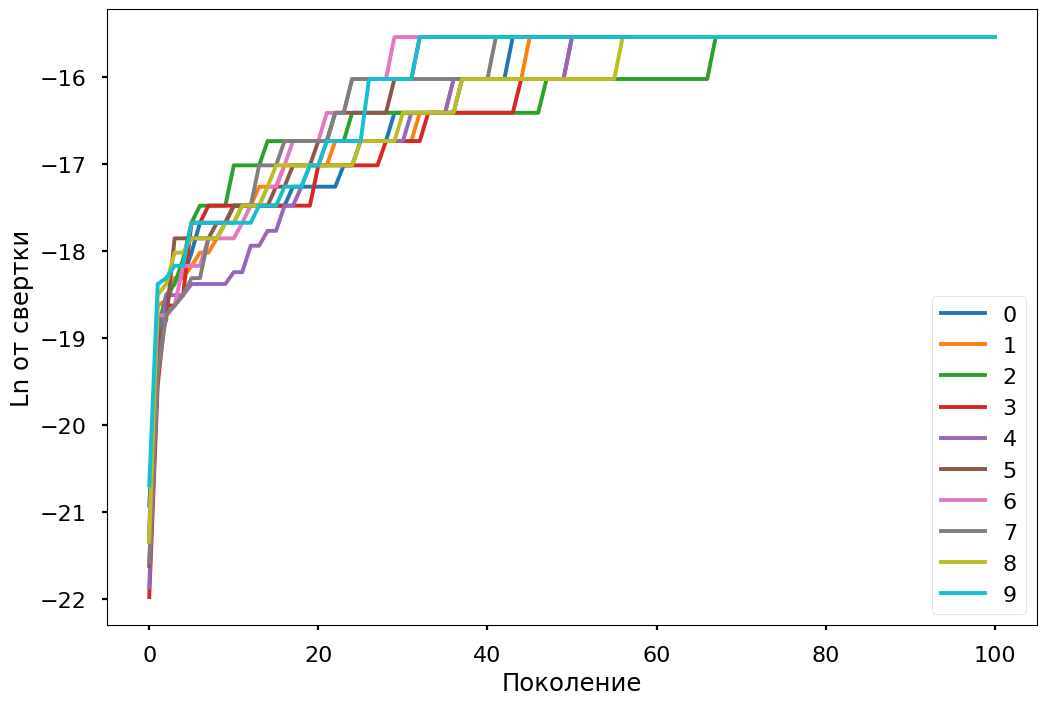

In [39]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

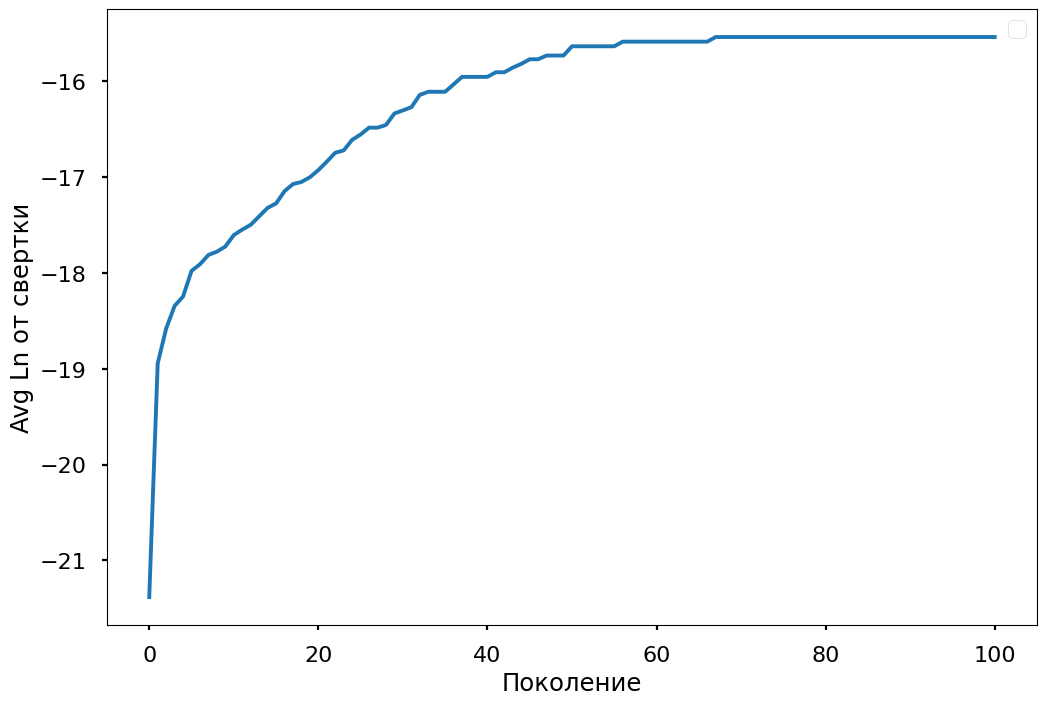

In [40]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

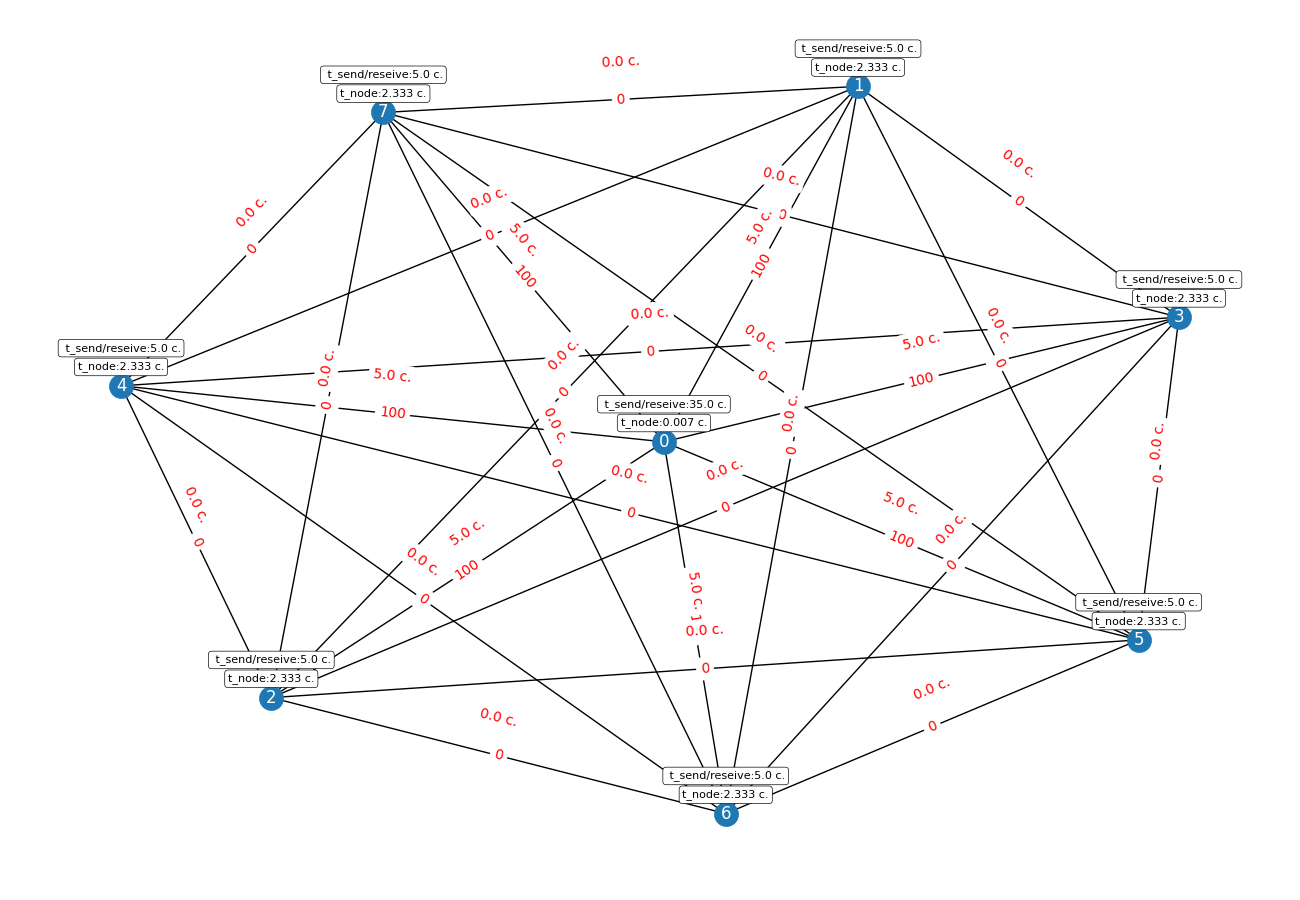

In [41]:
experements[0][-1][-1].draw_result()

In [42]:
print(experements[0][-1][-1])

Cвертка: 1.7849104189912902e-07,
Временя выполнение задачи (с): 121.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '34': 0, '35': 0, '36': 0, '37': 0, '45': 0, '46': 0, '47': 0, '56': 0, '57': 0, '67': 0}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.